# Оценка покупательской способности с помощью экономических индексов

**Выберите количество квадртаных метров арендуемой квартиры для дальнейшего анализа:**

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual #импортирование библиотек
import ipywidgets as widgets
def f(z): #создание функции для виджета
    return z
w = interactive(f, z=widgets.IntSlider(min=0,max=150,step=1,value=30)) #виджет с выбором от 0 до 150
display(w)

interactive(children=(IntSlider(value=30, description='z', max=150), Output()), _dom_classes=('widget-interact…

In [2]:
x = int(w.result) #значение, выбранное в виджете, задаётся в отдельную переменную для дальнейшего использования

In [3]:
import requests

In [4]:
from bs4 import BeautifulSoup #импортирование библиотеки для парсинга
url = 'https://www.26-2.ru/art/354854-projitochnyy-minimum' #ссылка с прожитучным минимумом
page = requests.get(url)

In [5]:
soup = BeautifulSoup(page.text, 'lxml')

In [6]:
living_minimum = [] #парсинг в список данных по тегам с сайта, содержащего прожиточный минимум
my_table = soup.find('table',{'border':'1'})
for rows in my_table.findAll('tr')[1::1]:
    cells = rows.findAll('td')
    cell0 = rows.find_all('p')[1]
    living_minimum.append(cell0.string)

In [7]:
test = [] #изменим тип данных для того, чтобы избавиться от лишних символов и оставить чистые значения
for i in range(0, len(living_minimum)):
    test.append(living_minimum[i].string.strip())

In [8]:
from unicodedata import normalize #для дальнейшего использования данных необходима нормализация
test2 = []
for i in range(len(test)):
    test2.append(normalize('NFKD', test[i]))

In [9]:
livmin = [] #обработка данных в списке для корректного использования в будущем
liv_min = []
lm = []
for i in range(len(test2)):
    liv_min.append(test2[i].replace(' ', '')) #удаление лишних пробелов
for i in range(len(liv_min)):
    livmin.append(liv_min[i].replace(',', '.')) #замена запятых на точку для распознания питоном
for i in range(len(livmin)):
    lm.append(int(float(livmin[i])))  
del lm [35] #удаление нерелевантного элемента в списке

In [10]:
url = 'http://fincan.ru/articles/16_srednyaya-zarplata-v-rossii-po-regionam-v-2018-godu/'
page0 = requests.get(url)

In [11]:
soup0 = BeautifulSoup(page0.text, 'lxml')

In [12]:
salary = [] #парсинг в список средней зарплаты по субъектам России
my_table2 = soup0.find('table',{'style':'width: 100%;'})
for rows in my_table2.findAll('tr')[1::1]:
    cells = rows.findAll('td')[1]
    salary.append(cells.text)

In [13]:
regions = [] #парсинг в отдельный список регионов для дальнейше обработки
my_table3 = soup0.find('table',{'style':'width: 100%;'})
for rows in my_table3.findAll('tr')[1::1]:
    cells = rows.findAll('td')[0]
    regions.append(cells.text)

In [14]:
regions[2]='ГорМосква' #переименование определенных регионов в списке, так как
                       #на разных сайтах не совпадает порядок регионов и их название
regions[9]='ГСанкт-Петербург'
regions[56]='ГорСевастополь'


In [15]:
import pandas as pd #создание датафрейма с объединенными регионами и средней зп
df_test = pd.DataFrame()
df_test['Страна'] = regions
df_test['Средняя зп']=salary

In [16]:
df=df_test.sort_values('Страна', ascending = True) #сортировка датафрейма по алфавиту
len(df)
rus = df[68:69] #добавление элемента 'Россия' в отдельную переменную

In [17]:
df1 = df.drop(df.index[68]) #Перемещение элемента 'Россия' в начало таблицы
df_main = rus.append(df1)
newst = [int(i) for i in df_main['Средняя зп']]

In [18]:
table = pd.read_excel('STATRUS.xlsx', index_col=0) #загрузка таюлицы excel с данными

![title](index.jpg)

**Индекс шаурмы показывает, сколько шаурмы в день сможет себе позволить средний житель каждого региона**


**Индекс кино показывает, сколько походов в кинотеатр в день сможет себе позволить средний житель каждого региона**


**Индекс бензина показывает, сколько километров в день может себе позволить проехать средний житель каждого региона (при расходе топлива 8 л на 100 км)**

## Общая таблица с рассчитанными индексами:

In [19]:
table["Средняя зарплата"] = newst #создание общей таблицы
lim = pd.DataFrame()
lim['Прожиточный минимум'] = lm #добавление столбца в переменную для встраивания в таблицу
table['Прожиточный минимум'] = lm #ниже: расчёт индексов по формуле
table['Индекс шаурмы'] = round((table['Средняя зарплата'] - table['Прожиточный минимум'] - x*table['Цена 1 м^2 за I квар 19'])/ table['Цена Шаурмы']/30, 2)
table['Индекс кино'] = round((table['Средняя зарплата'] - table['Прожиточный минимум'] - x*table['Цена 1 м^2 за I квар 19'])/ table['Билеты в Кино']/30, 2)
table['Индекс бензина'] = round((100/8)*(table['Средняя зарплата'] - table['Прожиточный минимум'] - x*table['Цена 1 м^2 за I квар 19'])/ table['Цена за 1 л бензина']/30, 2)
table

,Цена 1 м^2 за I квар 19,Цена Шаурмы,Билеты в Кино,Цена за 1 л бензина,Безработица,Средняя зарплата,Прожиточный минимум,Индекс шаурмы,Индекс кино,Индекс бензина
Регион,,,,,,,,,,
Россия,370,120,269,39.88,4.8,43381,10213,5.10,2.28,191.91
Алтайский край,336,110,250,37.37,7.1,24330,9559,0.40,0.18,14.84
Амурская область,474,130,300,41.65,5.7,40202,10980,2.63,1.14,102.66
Архангельская область,471,150,300,39.00,6.3,47039,12090,3.58,1.79,172.10
Астраханская область,333,110,230,40.24,7.9,32493,9622,2.89,1.38,98.90
Белгородская область,300,100,200,39.66,4.0,31478,8290,3.73,1.86,117.54
Брянская область,222,110,240,38.35,3.8,26218,9880,2.26,1.04,81.03
Владимирская область,300,120,270,39.23,4.4,29425,9754,2.13,0.95,81.47
Волгоградская область,310,105,200,40.07,5.8,30383,9069,2.83,1.49,92.69


In [20]:
table.to_excel('consuming_capacity.xlsx') #импорт файла excel

**Выберите данные, по которым хотите получить минимум, максимум, среднее значение и медиану:**

In [21]:
aa = widgets.ToggleButtons(
    options=['Цена Шаурмы', 'Билеты в Кино', 'Цена за 1 л бензина', 'Безработица', 'Средняя зарплата', 'Прожиточный минимум'],
    description='Столбец:',
    disabled=False,
    button_style='', 
)
display(aa) #виджет позволяет выбрать название столбца для того, чтобы узнать стат данные по нему

ToggleButtons(description='Столбец:', options=('Цена Шаурмы', 'Билеты в Кино', 'Цена за 1 л бензина', 'Безрабо…

In [22]:
z = aa.value #в отдельную переменную записывается выбор в виджете

In [23]:
print('Максимальное значение по выбранному столбцу:', max(table[z])) #расчёт стат данных по выбранному столбцы
print('Минимальное значение по выбранному столбцу:', min(table[z]))
print('Среднее значение по выбранному столбцу:', round(table[z].mean(), 1))
print('Медиана по выбранному столбцу:', table[z].median())

Максимальное значение по выбранному столбцу: 190
Минимальное значение по выбранному столбцу: 80
Среднее значение по выбранному столбцу: 120.3
Медиана по выбранному столбцу: 120.0


In [24]:
region = input('Введите название субъекта РФ: ') #при вводе региона выдаётся его значения в отдельной таблице
sm_table = table.loc[[region]]
sm_table

Введите название субъекта РФ: Чеченская республика


KeyError: "None of [['Чеченская республика']] are in the [index]"

In [25]:
import ipywidgets as widgets
qq = widgets.ToggleButtons(
    options=['Цена Шаурмы', 'Билеты в Кино', 'Цена за 1 л бензина', 'Безработица', 'Средняя зарплата', 'Прожиточный минимум', 'Индекс шаурмы', 'Индекс кино', 'Индекс бензина'],
    description='Столбец:',
    disabled=False,
    button_style='', 
)
display(qq) #виджет для выбора столбца, по которому будут строиться гистограмма и боксплот

ToggleButtons(description='Столбец:', options=('Цена Шаурмы', 'Билеты в Кино', 'Цена за 1 л бензина', 'Безрабо…

In [26]:
o = qq.value #в отдельную переменную записывается выбор в виджете

In [27]:
table[o].plot.hist() #построение гистрограммы по выбранному столбцу

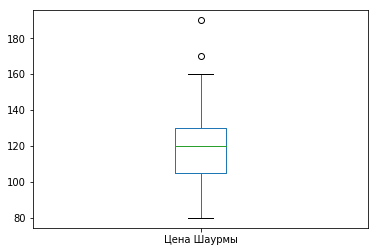

In [28]:
table[o].plot.box() #построение ящика с усиками по выбранному столбцу

AttributeError: module 'seaborn' has no attribute 'plt'

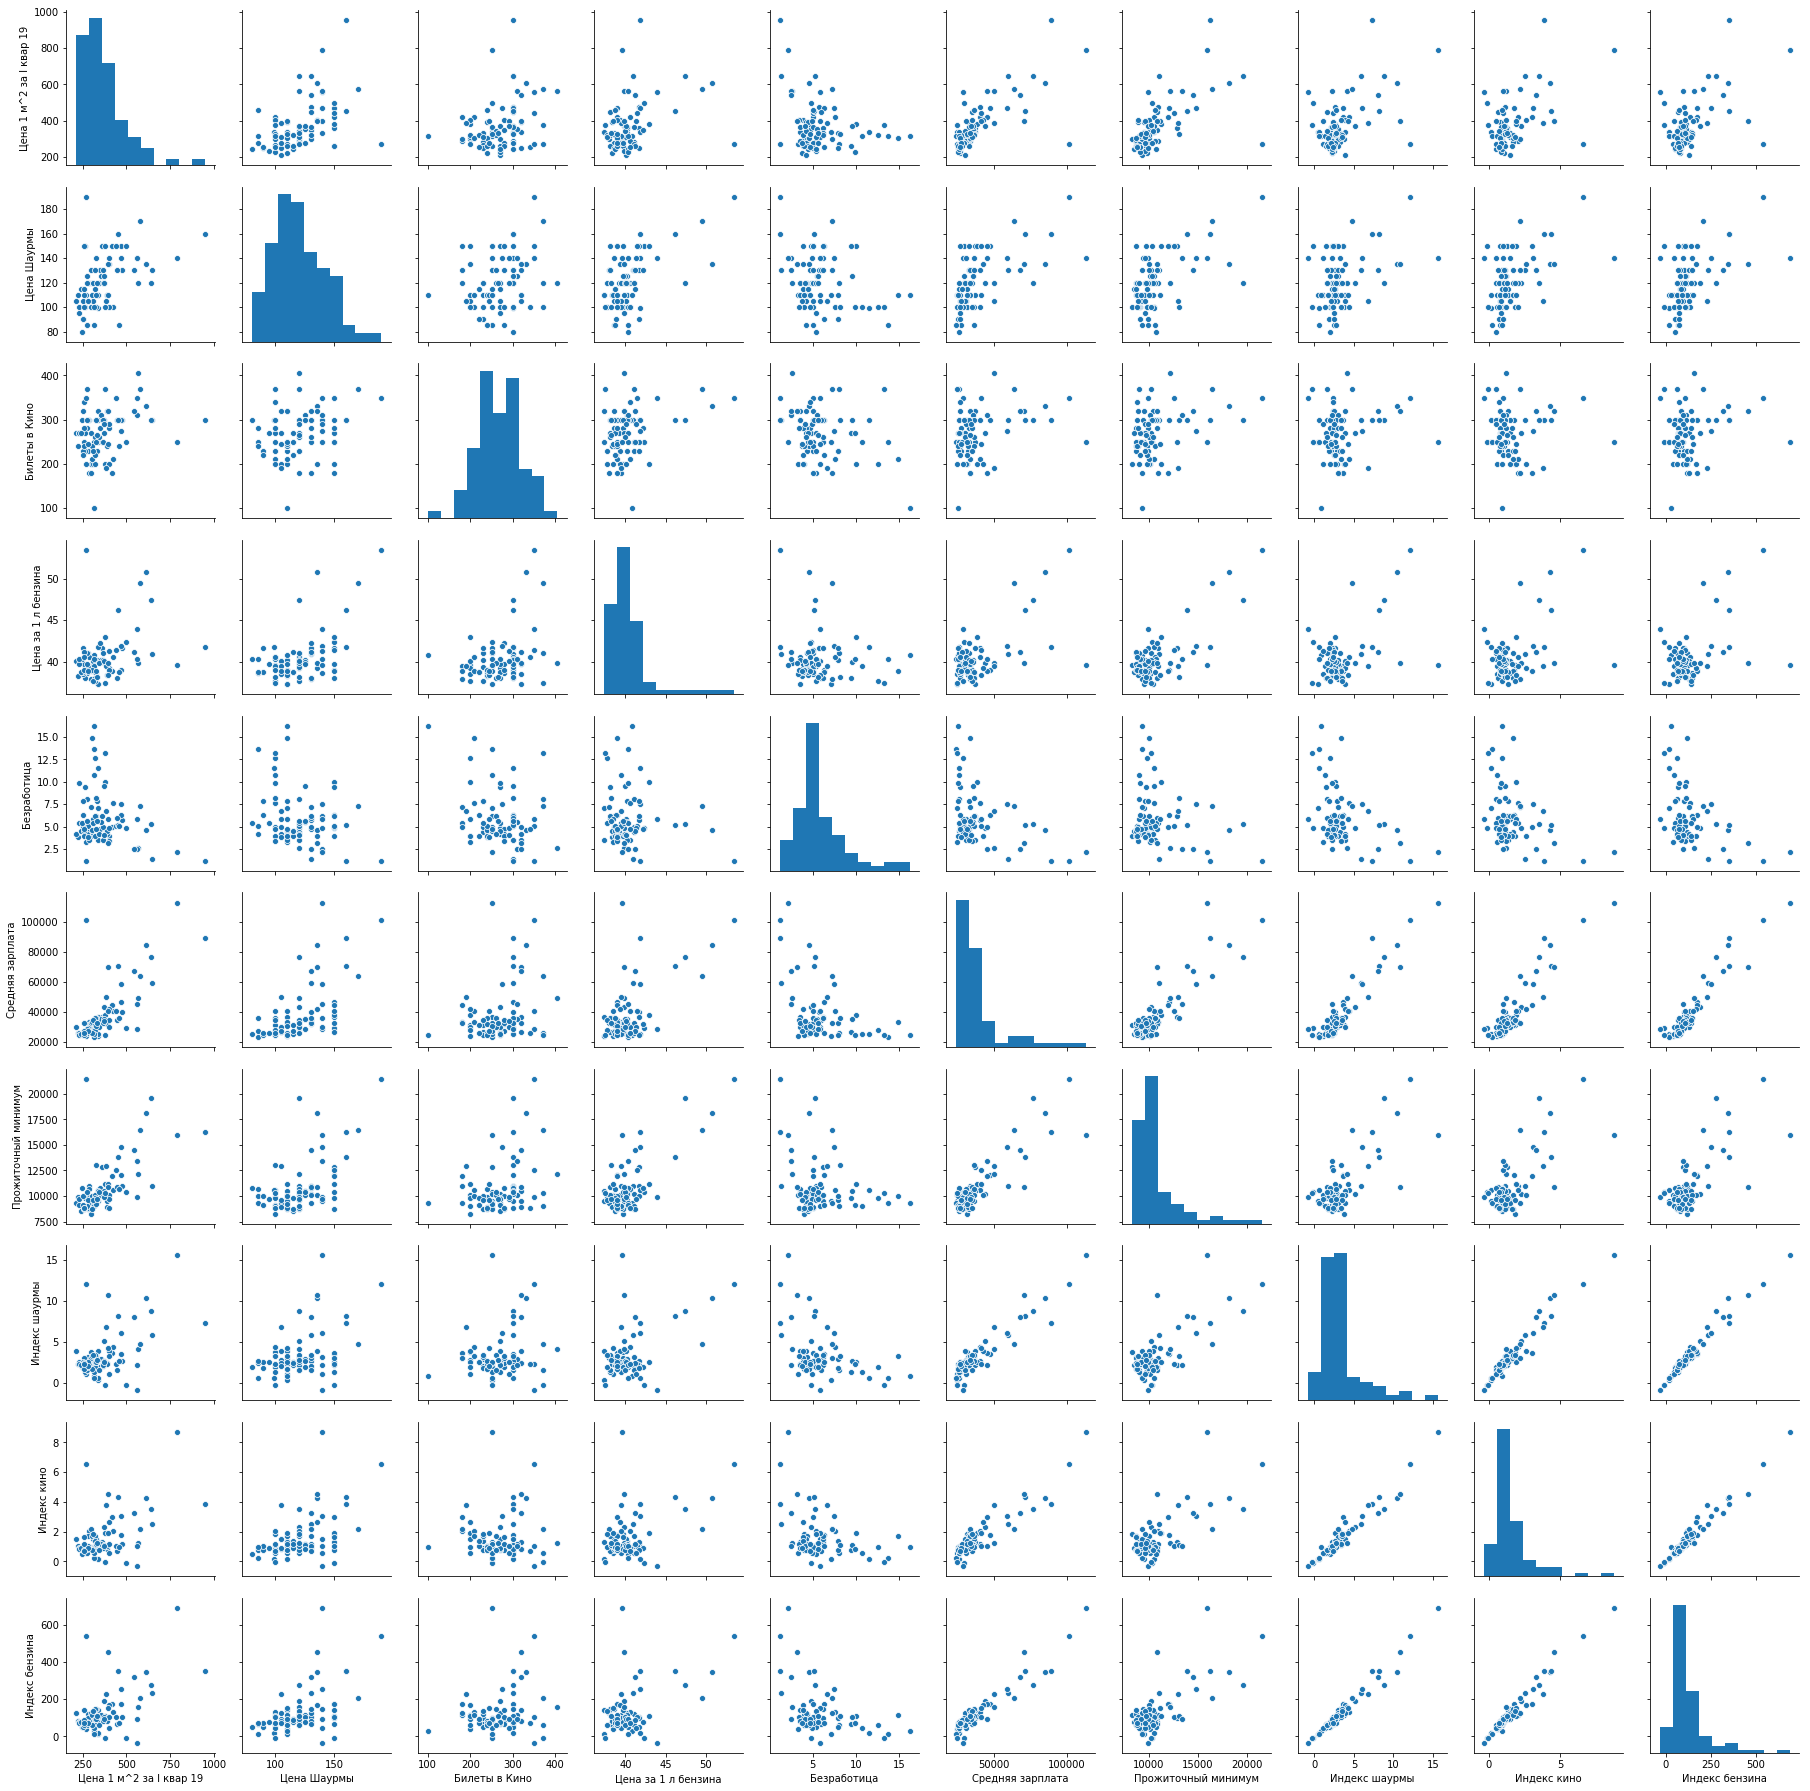

In [29]:
import seaborn as sns
df = sns.load_dataset('iris')
import matplotlib.pyplot as plt
# построение базовое матрицы корреляций
sns.pairplot(table)
sns.plt.show()


In [30]:
small = table.loc[:,'Безработица':'Индекс бензина'] #построение таблицы с корреляциями для heatmap
small.corr('spearman')

,Безработица,Средняя зарплата,Прожиточный минимум,Индекс шаурмы,Индекс кино,Индекс бензина
Безработица,1.000000,-0.253301,-0.050637,-0.270929,-0.205032,-0.280709
Средняя зарплата,-0.253301,1.000000,0.700447,0.820716,0.828766,0.885117
Прожиточный минимум,-0.050637,0.700447,1.000000,0.403762,0.419826,0.469928
Индекс шаурмы,-0.270929,0.820716,0.403762,1.000000,0.928696,0.960088
Индекс кино,-0.205032,0.828766,0.419826,0.928696,1.000000,0.952468
Индекс бензина,-0.280709,0.885117,0.469928,0.960088,0.952468,1.000000


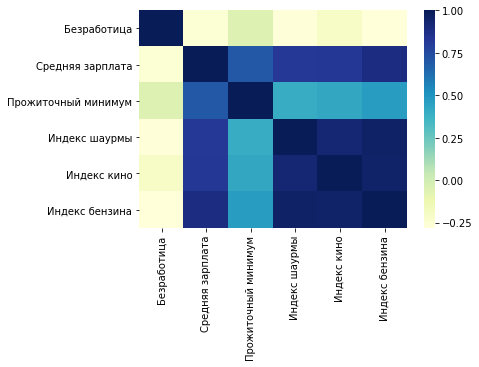

In [31]:
import seaborn as sn #построение карты с корреляциями между статистическими данными
sn.heatmap(small.corr('spearman'), cmap='YlGnBu')

In [32]:
!pip install folium 

In [33]:
import folium #импортирование библиотеки для построения таблицы
map = folium.Map(location=[66.417138,94.251545], zoom_start = 3.5, tiles = "Mapbox bright")

**Выберите один из четырёх параметров, по которым будет построена карта России:**

In [34]:
import ipywidgets as widgets
mp = widgets.ToggleButtons(
    options=['Безработица', 'Индекс шаурмы', 'Индекс кино', 'Индекс бензина'],
    description='Столбец:',
    disabled=False,
    button_style='', 
)
display(mp) #виджет для выбора одного из трех индексов или безработицы,
#по которым будет построена карта с данными по регионам

ToggleButtons(description='Столбец:', options=('Безработица', 'Индекс шаурмы', 'Индекс кино', 'Индекс бензина'…

In [36]:
map_choice = mp.value #в отдельную переменную записывается выбор в виджете

In [37]:
coordinates = pd.read_excel('regions_coordinates.xlsx', index_col=0) #выгрузка таблицы с координатами для построения карты
table_for_map = table[1:]

In [38]:
latitude = coordinates['Широта'] 
longitude = coordinates['Долгота']
values = table_for_map[map_choice]


if map_choice == 'Безработица':
    
    def color_change(x): #создание функции для различных цветов маркеров в зависимости от индекса
        if(x > 10): 
            return('red') 
        if(x <= 10) and (x >= 5):
            return('orange')
        if(x < 5):
            return('green')
    
    for latitude, longitude, values in zip(latitude, longitude, values):
        folium.Marker(location=[latitude, longitude], popup=str(values) + ' %', icon=folium.Icon(color = color_change(values))).add_to(map)
    
if map_choice == 'Индекс шаурмы':
    
    def color_change(x): #создание функции для различных цветов маркеров в зависимости от индекса
        if(x > 10):
            return('green')
        if(x <= 10) and (x >= 1):
            return('orange')
        if(x < 1):
            return('red')
    
    for latitude, longitude, values in zip(latitude, longitude, values):
        folium.Marker(location=[latitude, longitude], popup=str(values), icon=folium.Icon(color = color_change(values))).add_to(map)
    
if map_choice == 'Индекс кино':
    
    def color_change(x): #создание функции для различных цветов маркеров в зависимости от индекса
        if(x > 3):
            return('green')
        if(x <= 3) and (x >= 1):
            return('orange')
        if(x < 1):
            return('red')
    
    for latitude, longitude, values in zip(latitude, longitude, values):
        folium.Marker(location=[latitude, longitude], popup=str(values), icon=folium.Icon(color = color_change(values))).add_to(map)

if map_choice == 'Индекс бензина':
    
    def color_change(x): #создание функции для различных цветов маркеров в зависимости от индекса
        if(x > 200):
            return('green')
        if(x <= 200) and (x >= 50):
            return('orange')
        if(x < 50):
            return('red')
    
    for latitude, longitude, values in zip(latitude, longitude, values):
        folium.Marker(location=[latitude, longitude], popup=str(values) + ' km', icon=folium.Icon(color = color_change(values))).add_to(map)

In [145]:
map #карта с данными по регионам

## Источники
* Цена аренды квартиры, средняя зарплата, прожиточный минимум, безработица, цена бензина: Росстат

* Цена кино была собрана вручную по всем регионам России

* Цена шаурмы: <http://shaverma.tilda.ws> 